In [1]:
# HIDDEN
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
from scipy import stats

### Conditioning on a Continuous Variable ###
Suppose $X$ is a random variable and $A$ is an event that depends on $X$.

If $X$ is a discrete random variable, then for any possible value $x$ of $X$ the quantity $P(A \mid X = x)$ has a clear definition by the division rule:

$$
P(A \mid X = x) ~ = ~ \frac{P(A, X = x)}{P(X = x)}
$$

When $X$ is continuous, the denominator is 0. In this case there is one main idea to keep in mind:

- $P(A \mid X \in dx)$ is essentially constant over the entire infinitesimal interval $dx$. This constant value will be denoted $P(A \mid X = x)$.

So for continuous $X$, we will define
$$
P(A \mid X = x) ~ = ~ P(A \mid X \in dx) ~ \sim ~ \frac{P(A, X \in dx)}{P(X \in dx)} 
$$

We are assuming that the limit of the right hand side as $dx$ goes to 0 exists and doesn't depend exactly how $dx$ is defined: around $x$, or to the left of $x$, or to the right, and so on. This will be true under regularity conditions; you can just assume it works.

### Average Conditional Probabilities ###
We can now use our new notation and the multiplication rule to get

$$
P(A, X \in dx) ~ = ~ P(X \in dx)P(A \mid X = x) ~ \sim ~ f_X(x)dxP(A \mid X = x)
$$

Thus if $A$ is an event and $X$ a continuous random variable with density $f_X$, then

$$
P(A) ~ = ~ \int_{\text{all x}} P(A, X \in dx) ~ = ~ \int_{\text{all x}} P(A \mid X = x)f_X(x)dx
$$

In more compact notation, $P(A) = E(P(A \mid X))$ and thus is an example of finding expectation by conditioning.

### One Toss of a Random Coin ###

Let $X$ have any density on the unit interval $(0, 1)$. Think of the value of $X$ as the "$p$" of a coin, that is, the probability that the coin lands heads. Toss the coin once. Then 
$$
P(\text{coin lands heads} \mid X \in dp) ~ \sim ~ p
$$

regardless of exactly where $X$ is in the tiny interval around $p$. That is why this probability is called $P(\text{coin lands heads} \mid X = p)$. 

Notice that the probability doesn't involve the density of $X$. Once you are given the value of $X$, there is no randomness left in $X$; it becomes a constant.

Let $X$ have density $f_X$. Then

$$
P(\text{coin lands heads}, X \in dp) ~ = ~ P(X \in dp)P(\text{coin lands heads} \mid X = p) ~ \sim ~ f_X(p)dp \cdot p
$$
and so
$$
P(\text{coin lands heads}) ~ = ~ \int_0^1 p \cdot f_X(p)dp ~ = ~ E(X)
$$

Thus if $X$ is uniform on $(0, 1)$, that is, if $X$ has the beta $(1, 1)$ distribution, then the chance that the coin lands heads is $1/2$. If $X$ has the beta $(r, s)$ distribution then the chance that the coin lands heads is $r/(r+s)$.

### Two Tosses of a Random Coin ###
Let $X$ be uniform on $(0, 1)$. Given $X = p$, toss a $p$-coin twice. We have just observed that $P(\text{first toss is a head}) = 1/2$. The first toss behaves like the toss of a fair coin.

Now let's figure out the chance that both the trials are successes. We know that $P(\text{both tosses are heads} \mid X = p) ~ \sim ~ p^2$. So

$$
P(\text{both tosses are heads}) ~ = ~ \int_0^1 p^2 \cdot 1dp ~ = ~ \frac{1}{3}
$$

That's *greater than* $1/4$ which is the chance of two heads given that you are tossing a fair coin. 

Let's see what's going on here. We know that

\begin{align*}
P(\text{both tosses are heads}) ~ &= ~ P(\text{first toss is a head})
P(\text{second toss is a head} \mid \text{first toss is a head}) \\
&= ~ \frac{1}{2} P(\text{second toss is a head} \mid \text{first toss is a head})
\end{align*}

Therefore
$$
P(\text{second toss is a head} \mid \text{first toss is a head}) ~ = ~ \frac{2}{3} ~ > ~ \frac{1}{2}
$$

Clearly, knowing that the first toss is a head is telling us something about $X$, which is then reflected is the chance that the second toss is also a head.

To quantify this idea, we will find the conditional density of $X$ given that the first toss is a head. A good way is to find $P(X \in dp \mid \text{first toss is a head})$. That's a "backwards in time" conditional probability and can be found using Bayes' Rule.

\begin{align*}
P(X \in dp \mid \text{first toss is a head}) ~ &= ~ \frac{P(X \in dp \text{ and first toss is a head})}{P(\text{first toss is a head})} \\
&= ~ \frac{1dp \cdot p}{\frac{1}{2}} \\
&= ~ 2p \cdot dp
\end{align*}

Thus the conditional density of $X$ given that the first toss is a head is not uniform. It is $f(p) = 2p$ for $p \in (0, 1)$, which rises linearly. It puts more of its mass on values near 1 than near 0. This makes sense: given that the first toss is a head, we are more inclined to believe that the coin is biased towards heads than towards tails.

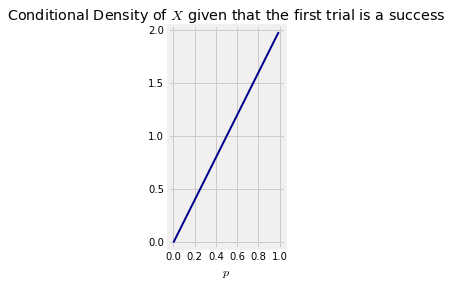

In [2]:
p = np.arange(0, 1, 0.01)
plt.plot(p, 2*p, color='darkblue', lw=2)
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 2.05)
plt.axes().set_aspect('equal')
plt.xlabel('$p$')
plt.title('Conditional Density of $X$ given that the first trial is a success');

We can now find $P(\text{second trial is a success} \mid \text{first trial is a success})$ using this conditional density. 

\begin{align*}
P(\text{second trial is a success} \mid \text{first trial is a success}) ~ &= ~ E(X \mid \text{first trial is a success}) \\
&= ~ \int_0^1 p \cdot 2p \cdot dp \\
&= ~ \frac{2}{3}
\end{align*}